# SVM

### 1. Import des libraries utiles

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR, NuSVR, LinearSVR, SVC, NuSVC, LinearSVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report

from collections import Counter

### 2. Description du dataset
1. Charger le dataset et afficher sa dimension

2. Afficher les 10 premières lignes de la table

3. Afficher la liste des variables et leurs types

4. En utilisant un piechart, représenter la variable v1.

5. Renommer les variables v1 et v2 en conséquence.


     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   
5  spam  FreeMsg Hey there darling it's been 3 week's n...        NaN   
6   ham  Even my brother is not like to speak with me. ...        NaN   
7   ham  As per your request 'Melle Melle (Oru Minnamin...        NaN   
8  spam  WINNER!! As a valued network customer you have...        NaN   
9  spam  Had your mobile 11 months or more? U R entitle...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
5        NaN        NaN  
6        NaN  

([<matplotlib.patches.Wedge at 0x1e1db9ac088>,
 [Text(-1.0038714981945518, 0.4497132587689916, 'ham'),
  Text(1.0038714771419537, -0.44971330576360763, 'spam')],
 [Text(-0.5475662717424827, 0.24529814114672266, '86.6%'),
  Text(0.5475662602592474, -0.2452981667801496, '13.4%')])

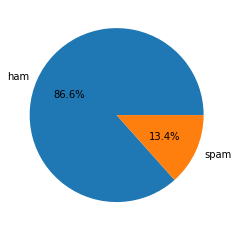

In [2]:
sms = pd.read_csv('SMS_spam.csv', encoding='latin-1')
print(sms.head(10),'\n',sms.dtypes)

plt.pie([sms.v1.value_counts()[0],sms.v1.value_counts()[1]],labels=['ham','spam'],autopct='%1.1f%%')
#si spam<5% besoin ajout données

 ### 3. Analyse des valeurs manquantes
1. Afficher le nombre ainsi que le pourcentage de valeurs manquantes par variable

2. Supprimer les variables qui présentent beaucoup de données manquantes.


v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64 
 v1            0.000000
v2            0.000000
Unnamed: 2    0.991027
Unnamed: 3    0.997846
Unnamed: 4    0.998923
dtype: float64


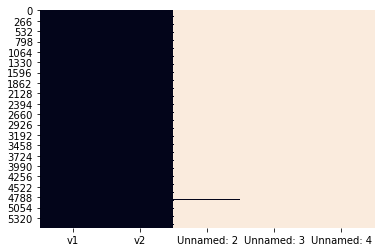

In [4]:
na = sms.isnull().sum()
nap = na/len(sms)
print(na,'\n',nap)
sns.heatmap(sms.isna(),cbar=False)
plt.show()

In [5]:
sms.drop(sms.columns[range(2,5)],axis=1,inplace=True)
sms

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


 ### 4. Analyse de données
1. En utilisant la fonction `Counter` de la librairie `collections` et les méthodes `.join` et `.split`, déterminer les 20 mots les plus fréquents dans le dataset. Représenter les résultats par un barplot.

2. De la même manière, les 20 mots les plus fréquents dans les non spam du dataset. Représenter les résultats par un barplot.

3. Même question pour les spams.

       0     1
0     to  2134
1    you  1622
2      I  1466
3      a  1327
4    the  1197
5    and   857
6     in   798
7     is   781
8      i   742
9      u   692
10   for   644
11    my   628
12    of   591
13  your   560
14    me   557
15    on   487
16  have   474
17     2   453
18  that   421
19    it   396
       0     1
0     to  1530
1    you  1458
2      I  1436
3    the  1019
4      a   969
5    and   738
6      i   736
7     in   734
8      u   645
9     is   638
10    my   619
11    me   537
12    of   498
13   for   475
14  that   398
15    it   375
16  your   373
17    on   352
18  have   346
19    at   333
       0    1
0     to  604
1      a  358
2   your  187
3   call  185
4     or  185
5    the  178
6      2  169
7    for  169
8    you  164
9     is  143
10  Call  136
11    on  135
12  have  128
13   and  119
14  from  116
15    ur  107
16  with  101
17     &   98
18     4   93
19    of   93


<BarContainer object of 20 artists>

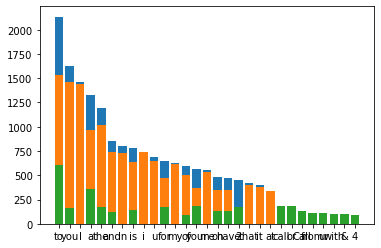

In [6]:
#1
freq = pd.DataFrame(Counter(' '.join(sms['v2']).split()).most_common(20))
print(freq)
plt.bar(freq[0],freq[1])
# mots fréquents = mots de liaison sans intérêt -> problème
#2
freqh = pd.DataFrame(Counter(' '.join(sms.v2[i] for i in range(len(sms)) if sms.v1[i]=='ham').split()).most_common(20))
print(freqh)
plt.bar(freqh[0],freqh[1])
#3
freqh = pd.DataFrame(Counter(' '.join(sms.v2[i] for i in range(len(sms)) if sms.v1[i]=='spam').split()).most_common(20))
print(freqh)
plt.bar(freqh[0],freqh[1])

 ### 5. Traitement des données avant modélisation
1. Que fait la fonction `CountVectorizer` de la librairie `feature_extraction` issue de `scikitlearn`?

2. Appliquer la fonction aux données et convertir le résultat en un `numpy array` que vous appelerez `X`.

3. Afficher les dimensions de `X`. Commenter.

4. Recoder la variable `is_spam` en utilisant la méthode `map`. 

In [5]:
#1
vec = CountVectorizer(stop_words = 'english')
'''
convert a collection of text documents to a matrix of token counts, sparse representation
default number of features = vocabulary size
'''
#2
X = vec.fit_transform(sms.v2).toarray()
#3
print(X.shape)
#4
is_spam = sms.v1.map({'spam':1,'ham':0})
is_spam

(5572, 8404)


0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: v1, Length: 5572, dtype: int64

 ### 6. Data splitting
 1.  Générer les échantillons d'apprentissage (training) et de test à l'aide de `sklearn.model_selection.train_test_split` en fixant le test_size à 0.3 et random_state à 1 et stratify = y . 
 
 2. Quelle est la signification de ces trois paramètres? 

In [6]:
y = sms.v1
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3,random_state=1,stratify=y)
'''
test_size pourcentage de lignes testé
random_state graine du générateur de nombre aléatoire
stratify affecte un label au split stratifié, répartition équitable avec Y
'''
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(3900, 8404) (1672, 8404) (3900,) (1672,)


 ### 7. Modélisation et Performances
 
 Nous allons à ce stade entraîner notre modèle SVM en utilisant la fonction `sklearn.svm.SVC`. Pour cela, nous ferons le paramètre de régularisation `C`.
 1. Créer un dictionnaire `param_grid` contenant deux couples clé - valeurs : `C` contenant la liste **[10, 50, 100,200]** et `kernel` contenant la liste suivante **['rbf','sigmoid']**.
 2. Instancier une `GridSearch` pour un modèle de SVM pour la classification avec pour paramètres : **cv=3**.
 3. Afficher le meilleur score obtenu et les meilleurs paramètres.
 4. Créer `pred_train` et `pred_test` qui sont respectivement les prédictions du meilleur modèle obtenu sur `X_train` et `X_test`.
 5. Afficher les scores de votre modèle sur l'échantillon d'apprentissage et l'échantillon de test en utilisation le `classification_report`.

In [ ]:
#1
param_grid = {'C':[10,50,100,200],'kernel':['rbf','sigmoid']}
param_grid
#2
gscv = GridSearchCV(
    SVC(),
    param_grid,
    cv = 3) #cv par défaut =5
gscv.fit(X_train,Y_train)
gscv.best_params_ #changer les params selon le résultat obtenu, ex réduire C

In [15]:
gscv.best_score_

0.9741025641025641

In [ ]:
#4
best_model = gscv.best_estimator_
pred_train = best_model.predict(X_train)
pred_test = best_model.predict(X_test)
print(pred_train,pred_test)
#5
print(classification_report(Y_train,pred_train),'\n',classification_report(Y_test,pred_test))